```
./treecode in=in_data.txt out=out_data.txt dtime=0.03 eps=11.17 theta=0.1 tstop=50 dtout=0.1 >log.txt
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
%config InlineBackend.figure_format='retina'

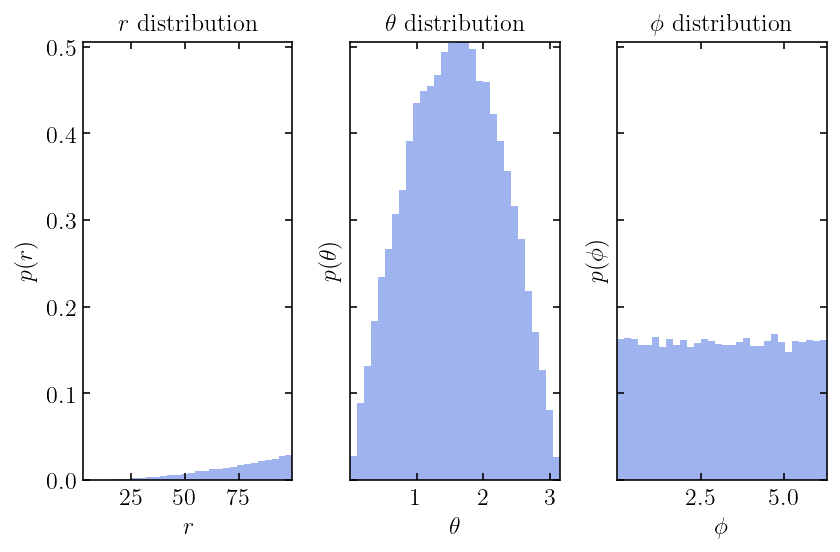

In [2]:
# generating initial points
N = int(3e4)

a = 100 #sphere radius

I = lambda x: a*x**(1/3)
I_theta = lambda x: np.arccos(1-2*x)

P = np.random.uniform(0,1,N) #the two probabilities must have different 
P_theta = np.random.uniform(0,1,N) #seed otherwise there's a correlation between them
r = I(P)
theta = I_theta(P_theta)
phi = np.random.uniform(0, 2*np.pi, N)


fig, axs = plt.subplots(1,3, tight_layout=True, sharey=True)
axs[0].set(title = fr'$r$ distribution', xlabel = r'$r$', ylabel = r'$p(r)$')
axs[0].hist(r, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0)
axs[1].set(title = fr'$\theta$ distribution', xlabel = r'$\theta$', ylabel = r'$p(\theta)$' )
axs[1].hist(theta, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0)
axs[2].set(title = fr'$\phi$ distribution', xlabel = r'$\phi$', ylabel = r'$p(\phi)$' )
axs[2].hist(phi, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0);

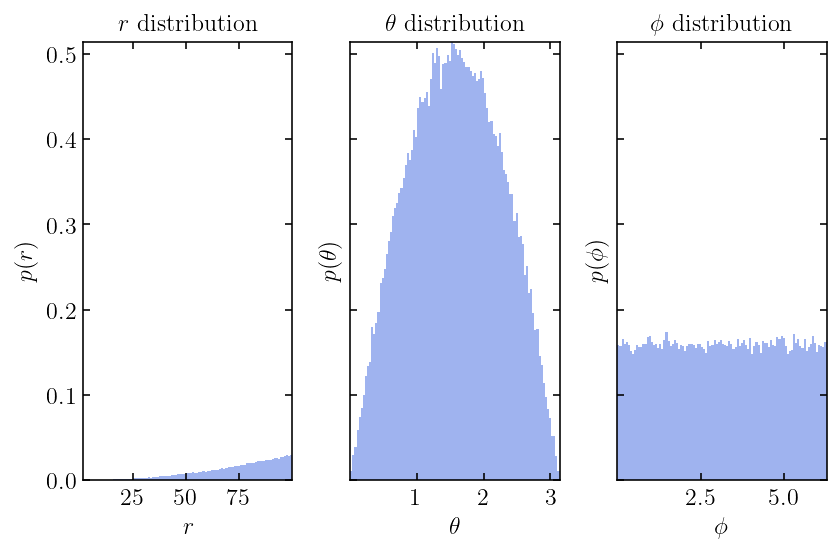

In [3]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

N_m = int(1e5)
P_m = np.random.uniform(0,1,N_m)
P_theta_m = np.random.uniform(0,1,N_m)

r_m = I(P_theta_m)
theta_m = I_theta(P_m)
phi_m = np.random.uniform(0, 2*np.pi, N_m)


fig, axs = plt.subplots(1,3, tight_layout=True, sharey=True)
axs[0].set(title = fr'$r$ distribution', xlabel = r'$r$', ylabel = r'$p(r)$')
axs[0].hist(r_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0)
axs[1].set(title = fr'$\theta$ distribution', xlabel = r'$\theta$', ylabel = r'$p(\theta)$' )
axs[1].hist(theta_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0)
axs[2].set(title = fr'$\phi$ distribution', xlabel = r'$\phi$', ylabel = r'$p(\phi)$')
axs[2].hist(phi_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0);

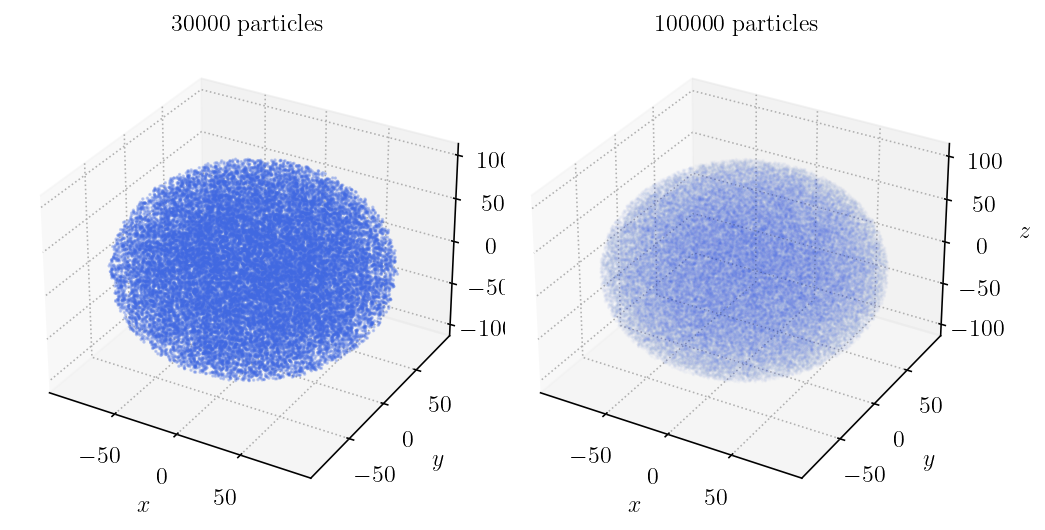

In [5]:
x_m = r_m*np.sin(theta_m)*np.cos(phi_m)
y_m = r_m*np.sin(theta_m)*np.sin(phi_m)
z_m = r_m*np.cos(theta_m)


fig, axs = plt.subplots(1,2, figsize = (7,7), tight_layout = True, subplot_kw={'projection': '3d'})
axs[0].set(aspect='auto', title = f'{N} particles', xlabel = r'$x$', ylabel = r'$y$', zlabel = r'$z$')
axs[0].scatter(x,y,z, s = .5, color='royalblue', alpha = .3)
axs[1].set(aspect='auto', title = f'{N_m} particles', xlabel = r'$x$', ylabel = r'$y$', zlabel = r'$z$')
axs[1].scatter(x_m,y_m,z_m, s =.5, color='royalblue', alpha = .025);

Density is compatible with a delta function for 84.67%.


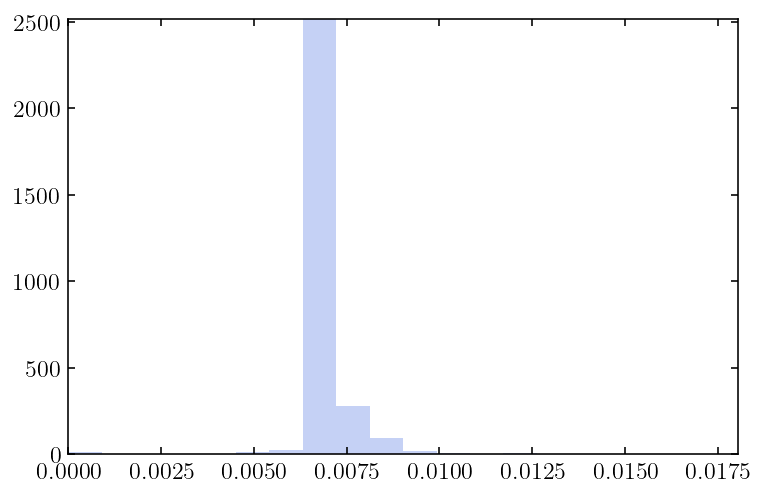

In [7]:
#Checking density
steps = 3000
scan = np.linspace(2, a, steps)
volume = 0
density = []
r_i = r.copy()

for i in scan:
    volume = (4/3) * np.pi * (i**3)
    mask = tuple([r_i <= i])
    new_r = r_i[mask]
    number = len(new_r)
    density.append(number/volume)

density = np.array(density)
counts, bins = np.histogram(density)
plt.hist(density, bins=20, color = 'royalblue', alpha = .3, lw = 0)
max = np.max(counts)
prob = max/steps
print('Density is compatible with a delta function for {:.2f}%.'.format(prob*100));

In [10]:
#softening
V = (4/3)*np.pi*a**3
eps = (V/N)**(1/3)
simu_eps = eps/(10*a)

print(eps, '\n', simu_eps)

5.1878703989086254 
 0.0051878703989086256


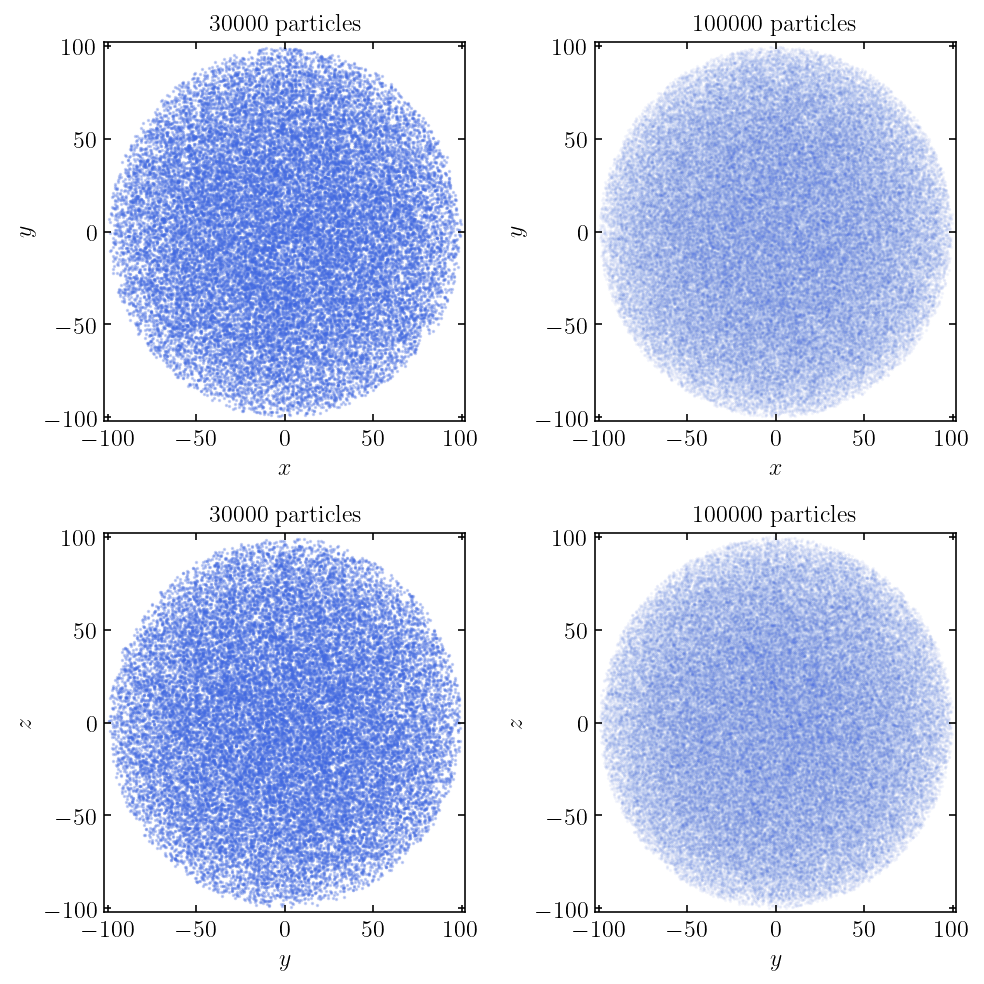

In [11]:
fig, axs = plt.subplots(2,2, figsize = (7,7), tight_layout = True)

for j in range(2):
    axs[0,j].set(xlabel = r'$x$', ylabel = r'$y$')
    axs[1,j].set(xlabel = r'$y$', ylabel = r'$z$')
    for i in range(2):
        axs[i,j].set(aspect='auto', xlim = [-a-2, a+2], ylim = [-a-2, a+2])
        axs[i,0].set(title = f'{N} particles')  
        axs[i,1].set(title = f'{N_m} particles')
    
axs[0,0].scatter(x,y, s = .5, color='royalblue', alpha = .3)
axs[1,0].scatter(y,z, s = .5, color='royalblue', alpha = .3)
axs[0,1].scatter(x_m,y_m, s = .5, color='royalblue', alpha =.05)
axs[1,1].scatter(y_m,z_m, s = .5, color='royalblue', alpha =.05);

In [12]:
# creating the input file
m = np.zeros(N)
dim = 3

for k in range(N):
    m[k] = .5

filename = 'in_data.txt'

with open (filename, 'w+') as f:
    f.write(str(N) + '\n')
    f.write(f'{dim}' + '\n')
    f.write('0' + '\n')
    for m_i in m:
        f.write(f'{m_i}' + '\n')
    for i in range(N):
        f.write(f'{x[i]} {y[i]} {z[i]}' + '\n')
    for j in range(N):
        f.write(f'0 0 0' + '\n')